In [171]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iphonedataset2022/iphone_purchase_records.csv


In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from scipy.stats import mode


In [173]:
dataset=pd.read_csv('../input/iphonedataset2022/iphone_purchase_records.csv')

In [174]:
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [175]:
dataset = dataset.drop('Gender',axis=1)

In [176]:
dataset.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [177]:
X=dataset.drop('Purchase Iphone',axis=1)
Y=dataset['Purchase Iphone']

In [178]:
print(X)
print(Y)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


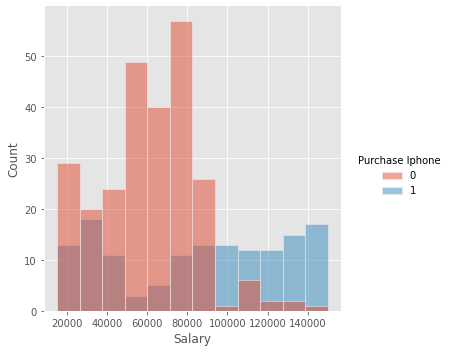

In [179]:
sns.displot(dataset,x='Salary',hue='Purchase Iphone')

In [180]:
def euclidean_distance(pt1,pt2):
    distance=np.sqrt(np.sum(pt1-pt2)**2)
    return distance

In [181]:
def KNN(X_train,X_test,Y_train,Y_test,k_val):
    y_hat=[]
    for test_pts in X_test.to_numpy():
        distances=[]
        for i in range(len(X_train)):
            distances.append(euclidean_distance((np.array(X_train.iloc[i])),test_pts))
        
        distance_data = pd.DataFrame(data=distances,columns=['distance'],index=Y_train.index)
        
        k_neighbors_list=distance_data.sort_values(by=['distance'],axis=0)[:k_val]
        
        labels=Y_train.loc[k_neighbors_list.index]
        
        voting=mode(labels).mode[0]
        y_hat.append(voting)
    return y_hat    


In [182]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=42)
y_hat_test=KNN(X_train,X_test,Y_train,Y_test,k_val=5)

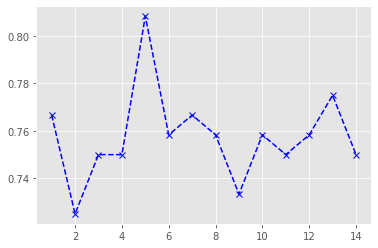

In [183]:
accuracy_vals=[]
for i in range(1,15):
    y_hat_test=KNN(X_train,X_test,Y_train,Y_test,k_val=i)
    accuracy_vals.append(accuracy_score(Y_test,y_hat_test))
plt.plot(range(1,15),accuracy_vals,color='blue',marker='x', linestyle='dashed')    

0.8083333333333333


Text(0.5, 1.0, 'KNN RESUlTS')

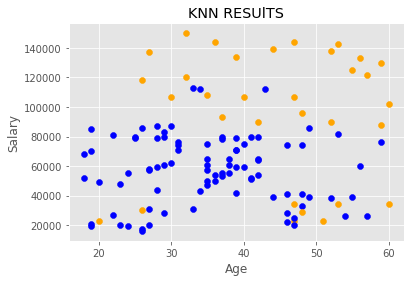

In [184]:
y_hat_test=KNN(X_train,X_test,Y_train,Y_test,k_val=5)
print(accuracy_score(Y_test,y_hat_test))
for i in range(len(y_hat_test)):
    if(y_hat_test[i]==0):
        plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'],color='blue')
    if(y_hat_test[i]==1):
        plt.scatter(X_test.iloc[i]['Age'],X_test.iloc[i]['Salary'],color='orange')
plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN RESUlTS')

<AxesSubplot:xlabel='Age', ylabel='Salary'>

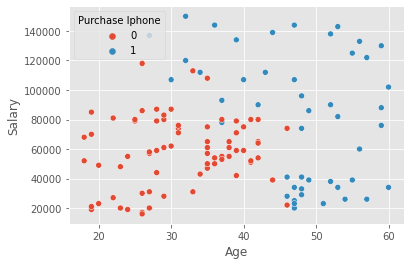

In [185]:
sns.scatterplot(data=dataset,x=X_test['Age'],y=X_test['Salary'],hue="Purchase Iphone")